In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
df_addfeatures = pd.read_excel('DataSet/add_features.xlsx')
print('Initial number of samples = %d'%(df_addfeatures.shape[0]))
print('Initial number of features = %d\n'%(df_addfeatures.shape[1]))
print('Features:',df_addfeatures.columns.values)
df_addfeatures.head(5)

Initial number of samples = 380
Initial number of features = 34

Features: ['Unnamed: 0' 'PID' 'VISIT' 'POG' 'ACCELERATIONS' 'BASELINE'
 'BASELINE_MIN' 'BASELINE_MAX' 'MINUTES_LOW' 'MINUTES_HIGH'
 'AVERAGE_VAR_BPM' 'AVERAGE_VAR_MS' 'STV_BPM' 'STV_MS' 'DECELS' 'EARLY'
 'LATE' 'SEV_VAR' 'MOD_VAR' 'PROLONGED' 'DECEL20_100' 'DECEL100' 'SIGLOSS'
 'FMP_COUNT' 'FMP_AVG_DURATION' 'FMP_FEATURE_DURATION'
 'FMP_FEATURE_PERCENT' 'TOCO_CONTRACTIONS' 'TOCO_CTR_FREQ' 'TOCO_DURATION'
 'TOCO_INTENSITY' 'TOCO_REST_TONE' 'TOCO_RELAXATION' 'TOCO_XDUCER']


,Unnamed: 0,PID,VISIT,POG,ACCELERATIONS,BASELINE,BASELINE_MIN,BASELINE_MAX,MINUTES_LOW,MINUTES_HIGH,...,FMP_AVG_DURATION,FMP_FEATURE_DURATION,FMP_FEATURE_PERCENT,TOCO_CONTRACTIONS,TOCO_CTR_FREQ,TOCO_DURATION,TOCO_INTENSITY,TOCO_REST_TONE,TOCO_RELAXATION,TOCO_XDUCER
0,FMAI0001_visit_1.cts,1,1,31.285714,11,145.0,137.0,152.0,0,17,...,226,728,19,13,2,84.75,2,55,77.50,9
1,FMAI0001_visit_2.cts,1,2,33.428571,6,136.0,106.0,145.0,12,16,...,98,214,8,7,1,114.75,1,52,177.75,9
2,FMAI0001_visit_3.cts,1,3,35.428571,1,151.0,146.0,161.0,19,0,...,88,116,4,1,0,194.25,0,25,0.00,9
3,FMAI0002_visit_1.cts,2,1,30.571429,5,135.0,122.0,141.0,0,24,...,167,471,12,1,0,141.00,0,21,0.00,9
4,FMAI0002_visit_2.cts,2,2,32.571429,5,136.0,130.0,139.0,0,27,...,114,348,18,0,0,0.00,0,0,0.00,9


In [4]:
output_df = pd.DataFrame(df_addfeatures)

In [5]:
columns_to_drop = ['PID','VISIT']
output_df.drop(columns=columns_to_drop, inplace=True)
output_df.shape

(380, 32)

In [6]:
output_df['Unnamed: 0'] = output_df['Unnamed: 0'].str.split('_').str[0]
output_df = output_df.groupby(['Unnamed: 0']).mean()
output_df

,POG,ACCELERATIONS,BASELINE,BASELINE_MIN,BASELINE_MAX,MINUTES_LOW,MINUTES_HIGH,AVERAGE_VAR_BPM,AVERAGE_VAR_MS,STV_BPM,...,FMP_AVG_DURATION,FMP_FEATURE_DURATION,FMP_FEATURE_PERCENT,TOCO_CONTRACTIONS,TOCO_CTR_FREQ,TOCO_DURATION,TOCO_INTENSITY,TOCO_REST_TONE,TOCO_RELAXATION,TOCO_XDUCER
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
FMAI0001,33.380952,6.000000,144.000000,129.666667,152.666667,10.333333,11.000000,12.966667,36.343333,2.560000,...,137.333333,352.666667,10.333333,7.000000,1.000000,131.2500,1.000000,44.00,85.083333,9.0
FMAI0002,34.928571,2.750000,118.500000,111.000000,129.000000,0.000000,14.250000,16.897500,75.942500,3.500000,...,86.750000,264.500000,9.750000,0.250000,0.000000,35.2500,0.000000,5.25,0.000000,9.0
FMAI0003,33.904762,4.166667,142.166667,123.333333,154.166667,0.000000,15.333333,22.548333,81.413333,3.741667,...,212.500000,684.666667,23.000000,0.833333,0.166667,14.3750,0.166667,10.00,62.791667,9.0
FMAI0004,36.428571,2.500000,135.250000,126.500000,140.000000,10.500000,11.000000,15.465000,63.335000,2.845000,...,112.750000,256.000000,8.750000,0.250000,0.000000,24.3125,0.000000,5.50,0.000000,9.0
FMAI0005,30.857143,3.800000,131.200000,124.200000,136.800000,6.400000,16.400000,13.208000,58.300000,2.418000,...,98.600000,351.800000,11.200000,1.000000,0.200000,71.7500,0.200000,15.20,350.500000,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FMAI0092,32.628571,6.800000,151.800000,147.400000,157.000000,7.800000,12.800000,16.024000,45.994000,2.980000,...,119.000000,360.600000,13.800000,0.400000,0.000000,28.7500,0.000000,9.40,71.200000,9.0
FMAI0093,32.000000,3.200000,141.600000,137.800000,145.600000,3.600000,14.000000,15.090000,47.694000,2.858000,...,120.200000,356.200000,16.600000,1.200000,0.200000,32.6000,0.200000,18.60,21.650000,9.0
FMAI0094,31.742857,6.200000,137.000000,126.000000,144.600000,0.000000,23.000000,21.344000,77.786000,3.492000,...,128.400000,453.000000,20.000000,0.400000,0.000000,32.6500,0.000000,4.60,0.000000,9.0


In [7]:
output_df = output_df.reset_index(level=0)
output_df = output_df.rename(columns={'Unnamed: 0': 'Sub. No.'})
output_df

,Sub. No.,POG,ACCELERATIONS,BASELINE,BASELINE_MIN,BASELINE_MAX,MINUTES_LOW,MINUTES_HIGH,AVERAGE_VAR_BPM,AVERAGE_VAR_MS,...,FMP_AVG_DURATION,FMP_FEATURE_DURATION,FMP_FEATURE_PERCENT,TOCO_CONTRACTIONS,TOCO_CTR_FREQ,TOCO_DURATION,TOCO_INTENSITY,TOCO_REST_TONE,TOCO_RELAXATION,TOCO_XDUCER
0,FMAI0001,33.380952,6.000000,144.000000,129.666667,152.666667,10.333333,11.000000,12.966667,36.343333,...,137.333333,352.666667,10.333333,7.000000,1.000000,131.2500,1.000000,44.00,85.083333,9.0
1,FMAI0002,34.928571,2.750000,118.500000,111.000000,129.000000,0.000000,14.250000,16.897500,75.942500,...,86.750000,264.500000,9.750000,0.250000,0.000000,35.2500,0.000000,5.25,0.000000,9.0
2,FMAI0003,33.904762,4.166667,142.166667,123.333333,154.166667,0.000000,15.333333,22.548333,81.413333,...,212.500000,684.666667,23.000000,0.833333,0.166667,14.3750,0.166667,10.00,62.791667,9.0
3,FMAI0004,36.428571,2.500000,135.250000,126.500000,140.000000,10.500000,11.000000,15.465000,63.335000,...,112.750000,256.000000,8.750000,0.250000,0.000000,24.3125,0.000000,5.50,0.000000,9.0
4,FMAI0005,30.857143,3.800000,131.200000,124.200000,136.800000,6.400000,16.400000,13.208000,58.300000,...,98.600000,351.800000,11.200000,1.000000,0.200000,71.7500,0.200000,15.20,350.500000,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,FMAI0092,32.628571,6.800000,151.800000,147.400000,157.000000,7.800000,12.800000,16.024000,45.994000,...,119.000000,360.600000,13.800000,0.400000,0.000000,28.7500,0.000000,9.40,71.200000,9.0
92,FMAI0093,32.000000,3.200000,141.600000,137.800000,145.600000,3.600000,14.000000,15.090000,47.694000,...,120.200000,356.200000,16.600000,1.200000,0.200000,32.6000,0.200000,18.60,21.650000,9.0
93,FMAI0094,31.742857,6.200000,137.000000,126.000000,144.600000,0.000000,23.000000,21.344000,77.786000,...,128.400000,453.000000,20.000000,0.400000,0.000000,32.6500,0.000000,4.60,0.000000,9.0
94,FMAI0095,34.357143,6.000000,137.500000,135.000000,141.000000,1.250000,21.750000,18.140000,55.505000,...,228.000000,565.500000,25.500000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,9.0


Text(0.5, 0, '% Missing Values')

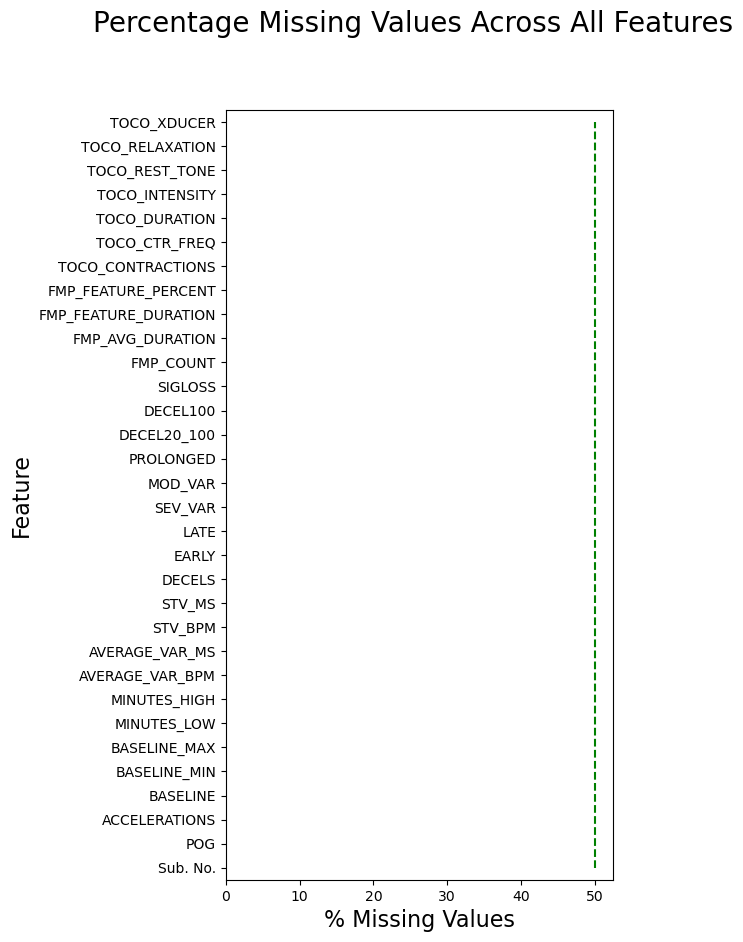

In [8]:
df_addfeatures = output_df
cutoff = 50
fig = plt.figure(figsize=(5,10))
percent_missing = (df_addfeatures.isnull().sum() / df_addfeatures.shape[0]) * 100
percent_missing.plot(kind = 'barh', color = cm.rainbow(np.linspace(0, 1, 2))[(percent_missing <= cutoff).values.astype(int)])
plt.plot( np.repeat(cutoff, df_addfeatures.shape[1]),np.arange(df_addfeatures.shape[1]), 'g--')
fig.suptitle('Percentage Missing Values Across All Features', fontsize = 20)
plt.ylabel('Feature', fontsize = 16)
plt.xlabel('% Missing Values', fontsize = 16)

In [9]:
output_df.to_excel('DataSet/readytomerge.xlsx', index=False)

In [10]:
# Read the dataset. Print first 5 records
df_original = pd.read_excel('DataSet/FMAI_CRF_1st_101.xlsx')
print('Initial number of samples = %d'%(df_original.shape[0]))
print('Initial number of features = %d\n'%(df_original.shape[1]))
print('Features:',df_original.columns.values)
df_original.head(5)

Initial number of samples = 102
Initial number of features = 417

Features: ['Sub. No.' 'Date of Recruitment' 'Informed Consent Y/N' 'Age'
 'Marital Status' 'Education_Wife' 'Education_Husband'
 'Avg Monthly Income' 'Employment_Wife' 'Employment_Husband'
 'Long Standing hours' 'Physical Activity Levels' 'Nutritional Status'
 'Diet_Type' 'Stress' 'No. of ANC visits' 'Level of ANC care'
 'POG_At_First_ANC' 'Type of Conception'
 'Interval b/w 2 successive pregnancies'
 'Any medical disorder/ medications @ around the time of conception'
 'H/O psychiatric or psychological problems prior to or around the time of conception'
 'Drug Abuse/Smoking/ Alcohol' 'Multiple pregnancy' 'Height (cms)'
 'Measured_height' 'Weight in 1st trimester (kg)' 'BMI in 1st trimester'
 'Parity Index' 'Current Gestational Age' 'Dating based on '
 'H/o Spontaneous preterm labour, number of PTD' 'No. of Spontaneous PTD'
 'Details of Spontaneous PTD' 'H/o iatrogenic PTD' 'No. of Iatrogenic PTD'
 'Details of Iatrogenic 

,Sub. No.,Date of Recruitment,Informed Consent Y/N,Age,Marital Status,Education_Wife,Education_Husband,Avg Monthly Income,Employment_Wife,Employment_Husband,...,"Any need of resuscitation, specify indication and type","NICU admission if any, indication","RDS, Jaundice, hypoglycemia, ICH, HIE, NEC, sepsis etc",Duration of NICU stay and reason,Did the subject complete the follow up,"If NO, specify date and reason of early termination",Subject lost to follow up,Adverse event,"Other, specify",Who took the decision? Investigator/ subject
0,FMAI0001,2022-06-07,Yes,31-35,Married,Doctorate,Doctorate,>10000/m,Ophthalmologist,Physician,...,No,No,No,NaN,Yes,NaN,No,No,NaN,NaN
1,FMAI0033,2022-11-04,Yes,26-30,Married,Graduate,Graduate,>10000/m,Housewife,Business,...,No,No,No,NaN,Yes,NaN,No,No,NaN,NaN
2,FMAI0072,2022-12-16,Yes,36-40,Married,10th Std,10th Std,>10000/m,Housewife,Contractor,...,Baby had weak cry at birth. Emergency cardiova...,"Yes, Baby had weak cry at birth. Emergency car...",No,7days. Reason:LBW/Preterm/SGA,Yes,NaN,No,No,NaN,NaN
3,FMAI0074,2022-12-20,Yes,36-40,Married,10th Std,10th Std,>10000/m,Housewife,Fishing,...,No,No,No,NaN,Yes,NaN,No,No,NaN,NaN
4,FMAI0082,2022-12-30,Yes,26-30,Married,10th Std,Graduate,>10000/m,Housewife,Engineer,...,No,No,No,NaN,Yes,NaN,No,No,NaN,NaN


In [11]:
rtm = pd.read_excel('DataSet/readytomerge.xlsx')
merged = pd.merge(df_original, rtm, on="Sub. No.", how="outer")

In [12]:
merged.to_excel('DataSet/merged.xlsx', index=False)

In [13]:
# Read the dataset. Print first 5 records
df_original = pd.read_excel('DataSet/merged.xlsx')
print('Initial number of samples = %d'%(df_original.shape[0]))
print('Initial number of features = %d\n'%(df_original.shape[1]))
print('Features:',df_original.columns.values)
df_original.head(5)

Initial number of samples = 102
Initial number of features = 448

Features: ['Sub. No.' 'Date of Recruitment' 'Informed Consent Y/N' 'Age'
 'Marital Status' 'Education_Wife' 'Education_Husband'
 'Avg Monthly Income' 'Employment_Wife' 'Employment_Husband'
 'Long Standing hours' 'Physical Activity Levels' 'Nutritional Status'
 'Diet_Type' 'Stress' 'No. of ANC visits' 'Level of ANC care'
 'POG_At_First_ANC' 'Type of Conception'
 'Interval b/w 2 successive pregnancies'
 'Any medical disorder/ medications @ around the time of conception'
 'H/O psychiatric or psychological problems prior to or around the time of conception'
 'Drug Abuse/Smoking/ Alcohol' 'Multiple pregnancy' 'Height (cms)'
 'Measured_height' 'Weight in 1st trimester (kg)' 'BMI in 1st trimester'
 'Parity Index' 'Current Gestational Age' 'Dating based on '
 'H/o Spontaneous preterm labour, number of PTD' 'No. of Spontaneous PTD'
 'Details of Spontaneous PTD' 'H/o iatrogenic PTD' 'No. of Iatrogenic PTD'
 'Details of Iatrogenic 

,Sub. No.,Date of Recruitment,Informed Consent Y/N,Age,Marital Status,Education_Wife,Education_Husband,Avg Monthly Income,Employment_Wife,Employment_Husband,...,FMP_AVG_DURATION,FMP_FEATURE_DURATION,FMP_FEATURE_PERCENT,TOCO_CONTRACTIONS,TOCO_CTR_FREQ,TOCO_DURATION,TOCO_INTENSITY,TOCO_REST_TONE,TOCO_RELAXATION,TOCO_XDUCER
0,FMAI0001,2022-06-07,Yes,31-35,Married,Doctorate,Doctorate,>10000/m,Ophthalmologist,Physician,...,137.333333,352.666667,10.333333,7.000000,1.0,131.250000,1.0,44.0,85.083333,9.0
1,FMAI0033,2022-11-04,Yes,26-30,Married,Graduate,Graduate,>10000/m,Housewife,Business,...,99.500000,300.500000,11.500000,0.000000,0.0,0.000000,0.0,0.0,0.000000,9.0
2,FMAI0072,2022-12-16,Yes,36-40,Married,10th Std,10th Std,>10000/m,Housewife,Contractor,...,70.500000,272.500000,10.500000,3.000000,1.0,72.750000,1.0,61.5,389.125000,9.0
3,FMAI0074,2022-12-20,Yes,36-40,Married,10th Std,10th Std,>10000/m,Housewife,Fishing,...,127.333333,431.333333,17.666667,0.666667,0.0,93.416667,0.0,14.0,0.000000,9.0
4,FMAI0082,2022-12-30,Yes,26-30,Married,10th Std,Graduate,>10000/m,Housewife,Engineer,...,136.000000,352.000000,10.000000,2.000000,0.0,173.750000,0.0,37.0,262.500000,9.0


In [14]:
# get the percentage of null values in each column
(df_original.isna().sum() / df_original.shape[0]) * 100

Sub. No.                0.000000
Date of Recruitment     0.000000
Informed Consent Y/N    0.000000
Age                     0.000000
Marital Status          0.000000
                          ...   
TOCO_DURATION           5.882353
TOCO_INTENSITY          5.882353
TOCO_REST_TONE          5.882353
TOCO_RELAXATION         5.882353
TOCO_XDUCER             5.882353
Length: 448, dtype: float64

In [15]:
# check any records are duplicated. Returns a record, if it is a duplicate
df_original[df_original.duplicated()]

,Sub. No.,Date of Recruitment,Informed Consent Y/N,Age,Marital Status,Education_Wife,Education_Husband,Avg Monthly Income,Employment_Wife,Employment_Husband,...,FMP_AVG_DURATION,FMP_FEATURE_DURATION,FMP_FEATURE_PERCENT,TOCO_CONTRACTIONS,TOCO_CTR_FREQ,TOCO_DURATION,TOCO_INTENSITY,TOCO_REST_TONE,TOCO_RELAXATION,TOCO_XDUCER


Text(0.5, 0, '% Missing Values')

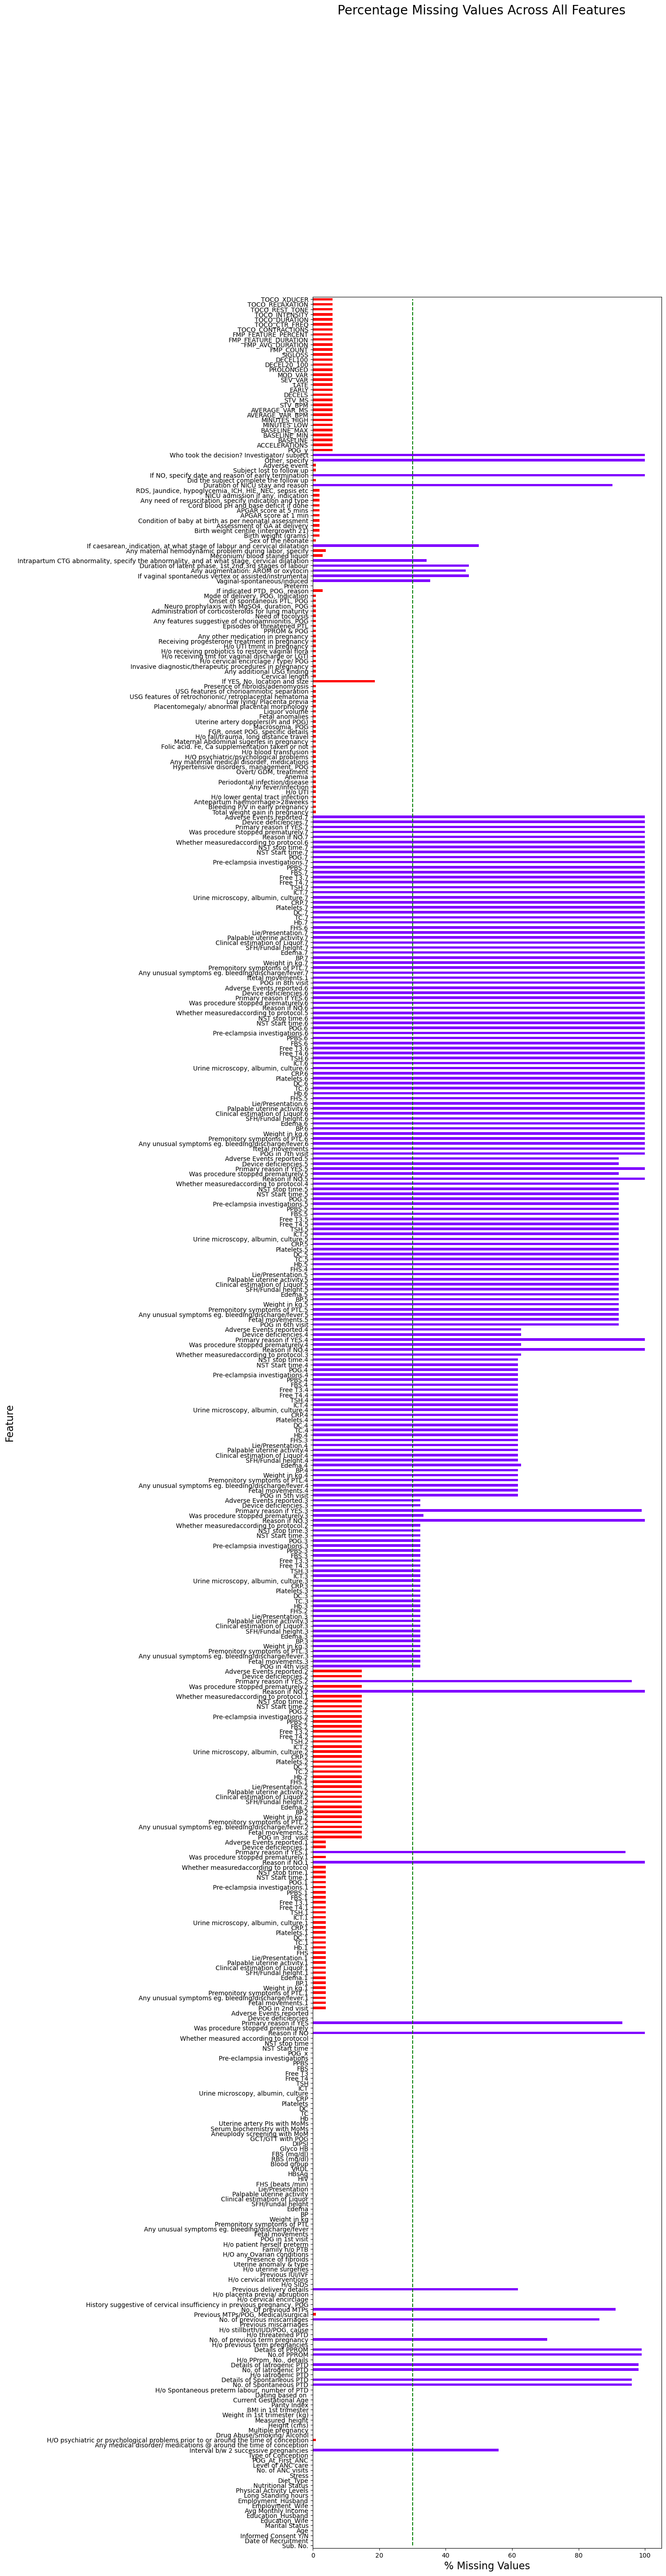

In [16]:
# Consider 30 % as cutoff. If a feature has missing values percent more than cutoff, it will plot in a different colour
cutoff = 30
fig = plt.figure(figsize=(10,65))
percent_missing = (df_original.isna().sum() / df_original.shape[0]) * 100
percent_missing.plot(kind = 'barh', color = cm.rainbow(np.linspace(0, 1, 2))[(percent_missing <= cutoff).values.astype(int)])
plt.plot( np.repeat(cutoff, df_original.shape[1]),np.arange(df_original.shape[1]), 'g--')
fig.suptitle('Percentage Missing Values Across All Features', fontsize = 20)
plt.ylabel('Feature', fontsize = 16)
plt.xlabel('% Missing Values', fontsize = 16)

In [17]:
df_original.shape

(102, 448)

In [18]:
df1 = df_original.loc[:, (df_original.isna().sum() / df_original.shape[0]) * 100 < 30]

In [19]:
df1.shape

(102, 251)

In [20]:
def unique_cols(df):
    a = df.to_numpy()
    return (a[0] == a).all(0)

sum(unique_cols(df1))

16

In [21]:
col_to_drop = df1.loc[:, unique_cols(df1)]
col_to_drop

,Informed Consent Y/N,Marital Status,Avg Monthly Income,Nutritional Status,Drug Abuse/Smoking/ Alcohol,Multiple pregnancy,"History suggestive of cervical insufficiency in previous pregnancy, POG",H/o cervical encirclage,H/o SIDS,H/o cervical interventions,Palpable uterine activity,HIV,VRDL,Whether measured according to protocol,Device deficiencies,Adverse Events reported
0,Yes,Married,>10000/m,Good,No,No,No,No,No,No,No,Negative,Negative,Yes,No,No
1,Yes,Married,>10000/m,Good,No,No,No,No,No,No,No,Negative,Negative,Yes,No,No
2,Yes,Married,>10000/m,Good,No,No,No,No,No,No,No,Negative,Negative,Yes,No,No
3,Yes,Married,>10000/m,Good,No,No,No,No,No,No,No,Negative,Negative,Yes,No,No
4,Yes,Married,>10000/m,Good,No,No,No,No,No,No,No,Negative,Negative,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Yes,Married,>10000/m,Good,No,No,No,No,No,No,No,Negative,Negative,Yes,No,No
98,Yes,Married,>10000/m,Good,No,No,No,No,No,No,No,Negative,Negative,Yes,No,No
99,Yes,Married,>10000/m,Good,No,No,No,No,No,No,No,Negative,Negative,Yes,No,No
100,Yes,Married,>10000/m,Good,No,No,No,No,No,No,No,Negative,Negative,Yes,No,No


In [22]:
df1 = df1.drop(columns=col_to_drop)

In [23]:
df1.shape

(102, 235)

In [24]:
# columns with single value
cols_to_drop = ['Fetal movements.1','Premonitory symptoms of PTL.1','Whether measuredaccording to protocol','Device deficiencies.1','Adverse Events reported.1','Fetal movements.2','Any unusual symptoms eg. bleeding/discharge/fever.2','Palpable uterine activity.2','ICT.2','Free T4.2','Free T3.2','Whether measuredaccording to protocol.1','Device deficiencies.2','Adverse Events reported.2','Periodontal infection/disease','H/O psychiatric/psychological problems','H/o blood transfusion','Folic acid. Fe, Ca supplementation taken or not','Maternal Abdominal sugeries in pregnancy','Macrosomia, POG','Placentomegaly/ abnormal placental morphology','USG features of retrochorionic/ retroplacental hematoma','USG features of chorioamniotic separation','H/o cervical encirclage / type/ POG','H/o receiving probiotics to restore vaginal flora','Did the subject complete the follow up','Subject lost to follow up','Adverse event','EARLY','TOCO_XDUCER']

In [25]:
df1 = df1.drop(columns=cols_to_drop)

In [26]:
df1.shape

(102, 205)

In [27]:
df1 = df1.replace('ND',np.nan)

Text(0.5, 0, '% Missing Values')

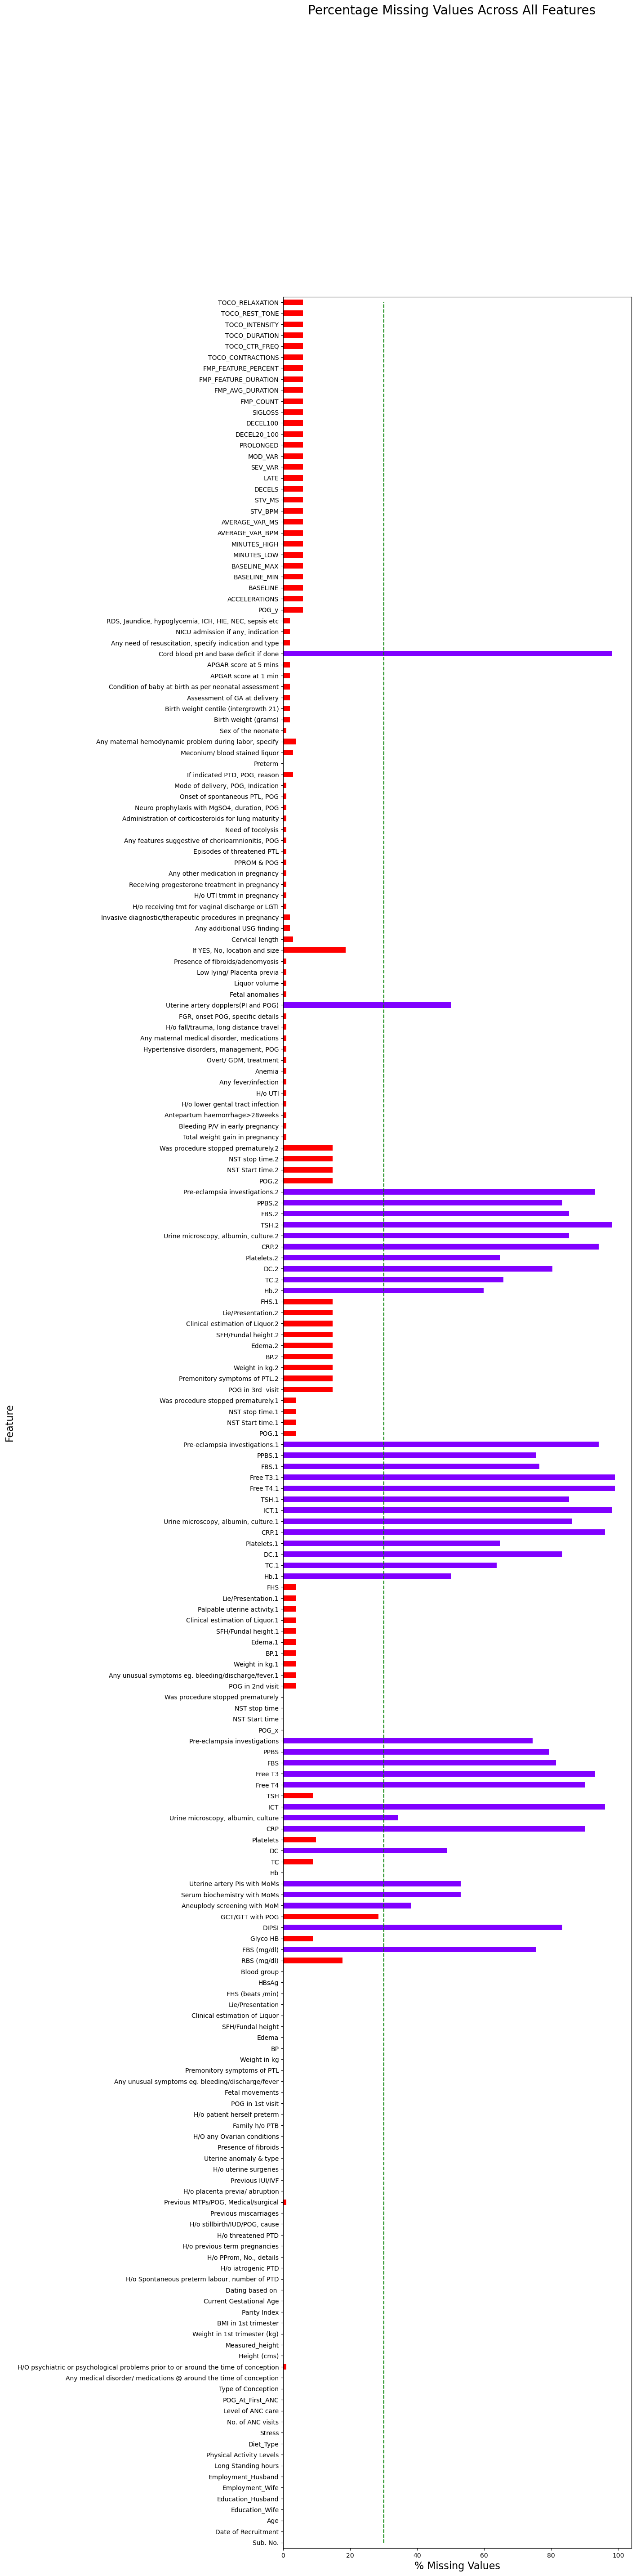

In [28]:
# Consider 30 % as cutoff. If a feature has missing values percent more than cutoff, it will plot in a different colour
cutoff = 30
fig = plt.figure(figsize=(10,65))
percent_missing = (df1.isna().sum() / df1.shape[0]) * 100
percent_missing.plot(kind = 'barh', color = cm.rainbow(np.linspace(0, 1, 2))[(percent_missing <= cutoff).values.astype(int)])
plt.plot(np.repeat(cutoff, df1.shape[1]),np.arange(df1.shape[1]), 'g--')
fig.suptitle('Percentage Missing Values Across All Features', fontsize = 20)
plt.ylabel('Feature', fontsize = 16)
plt.xlabel('% Missing Values', fontsize = 16)

In [29]:
df1 = df1.loc[:, (df1.isna().sum() / df1.shape[0]) * 100 < 30]

In [30]:
df1.shape

(102, 166)

In [31]:
cols_to_drop =['Date of Recruitment', 'Education_Wife', 'Education_Husband', 'Employment_Wife', 'Employment_Husband']

In [32]:
df1 = df1.drop(columns=cols_to_drop)

In [33]:
df1.shape

(102, 161)

In [34]:
df1.to_excel('DataSet/FinalData.xlsx', index=False)

In [35]:
# get columns with numeric data
df1._get_numeric_data()

,No. of ANC visits,Measured_height,Weight in 1st trimester (kg),BMI in 1st trimester,Weight in kg,SFH/Fundal height,FHS (beats /min),RBS (mg/dl),Glyco HB,Hb,...,FMP_COUNT,FMP_AVG_DURATION,FMP_FEATURE_DURATION,FMP_FEATURE_PERCENT,TOCO_CONTRACTIONS,TOCO_CTR_FREQ,TOCO_DURATION,TOCO_INTENSITY,TOCO_REST_TONE,TOCO_RELAXATION
0,6,162.0,60.5,23.40,62.30,31,148,135.0,4.9,10.7,...,4.333333,137.333333,352.666667,10.333333,7.000000,1.0,131.250000,1.0,44.0,85.083333
1,7,161.0,51.0,19.68,58.50,29,150,NaN,5.1,10.3,...,6.500000,99.500000,300.500000,11.500000,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,7,156.0,44.0,18.10,46.20,29,146,95.0,5.3,12.8,...,6.500000,70.500000,272.500000,10.500000,3.000000,1.0,72.750000,1.0,61.5,389.125000
3,8,152.0,60.0,26.00,63.78,28,148,NaN,5.1,12.2,...,7.333333,127.333333,431.333333,17.666667,0.666667,0.0,93.416667,0.0,14.0,0.000000
4,6,156.0,55.0,22.60,65.10,27,138,98.0,5.7,10.3,...,5.000000,136.000000,352.000000,10.000000,2.000000,0.0,173.750000,0.0,37.0,262.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,8,151.0,53.0,23.24,64.30,29,146,NaN,4.1,13.7,...,8.200000,120.600000,425.800000,16.800000,0.800000,0.0,107.050000,0.0,24.0,0.000000
98,8,157.0,59.0,23.90,68.10,28,160,92.0,5.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,6,166.0,63.0,22.90,73.40,29,142,117.0,NaN,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,7,152.0,39.0,16.90,48.70,29,138,129.0,4.9,11.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
num_col = df1._get_numeric_data().columns.values
num_col

array(['No. of ANC visits', 'Measured_height',
       'Weight in 1st trimester (kg)', 'BMI in 1st trimester',
       'Weight in kg', 'SFH/Fundal height', 'FHS (beats /min)',
       'RBS (mg/dl)', 'Glyco HB', 'Hb', 'TC', 'Platelets', 'TSH',
       'Weight in kg.1', 'SFH/Fundal height.1', 'FHS', 'Weight in kg.2',
       'SFH/Fundal height.2', 'FHS.1', 'Birth weight (grams)', 'POG_y',
       'ACCELERATIONS', 'BASELINE', 'BASELINE_MIN', 'BASELINE_MAX',
       'MINUTES_LOW', 'MINUTES_HIGH', 'AVERAGE_VAR_BPM', 'AVERAGE_VAR_MS',
       'STV_BPM', 'STV_MS', 'DECELS', 'LATE', 'SEV_VAR', 'MOD_VAR',
       'PROLONGED', 'DECEL20_100', 'DECEL100', 'SIGLOSS', 'FMP_COUNT',
       'FMP_AVG_DURATION', 'FMP_FEATURE_DURATION', 'FMP_FEATURE_PERCENT',
       'TOCO_CONTRACTIONS', 'TOCO_CTR_FREQ', 'TOCO_DURATION',
       'TOCO_INTENSITY', 'TOCO_REST_TONE', 'TOCO_RELAXATION'],
      dtype=object)

In [37]:
X = df1._get_numeric_data()
y = df1['Preterm']

In [38]:
y = y.replace('No',1)
y = y.replace('Yes',0)

In [39]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(X)
X = imputer.transform(X)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 30)

In [41]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [42]:
%pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [43]:
# If lazypredict throws error, then execute the below line
# pip install threadpoolctl==3.1.0

In [44]:
from lazypredict.Supervised import LazyClassifier

# Initialize the Lazypredict library
clf = LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None)

# Fit all classification algorithms on training dataset
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

# Calculate performance of all models on test dataset
model_dictionary = clf.provide_models(X_train,X_test,y_train,y_test)
models

 31%|███       | 9/29 [00:00<00:00, 22.43it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 55%|█████▌    | 16/29 [00:00<00:00, 26.20it/s]

NuSVC model failed to execute
specified nu is infeasible


 76%|███████▌  | 22/29 [00:00<00:00, 23.64it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:01<00:00, 17.37it/s]

[LightGBM] [Info] Number of positive: 71, number of negative: 10
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 81, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.876543 -> initscore=1.960095
[LightGBM] [Info] Start training from score 1.960095
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.81,0.89,0.89,0.84,0.02
NearestCentroid,0.81,0.89,0.89,0.84,0.02
PassiveAggressiveClassifier,0.76,0.86,0.86,0.80,0.02
RidgeClassifierCV,0.95,0.83,0.83,0.95,0.02
AdaBoostClassifier,0.90,0.81,0.81,0.90,0.15
SGDClassifier,0.67,0.81,0.81,0.72,0.02
LogisticRegression,0.90,0.81,0.81,0.90,0.03
LinearDiscriminantAnalysis,0.86,0.78,0.78,0.87,0.03
BernoulliNB,0.86,0.78,0.78,0.87,0.01


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 19)


imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(X)
X = imputer.transform(X)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

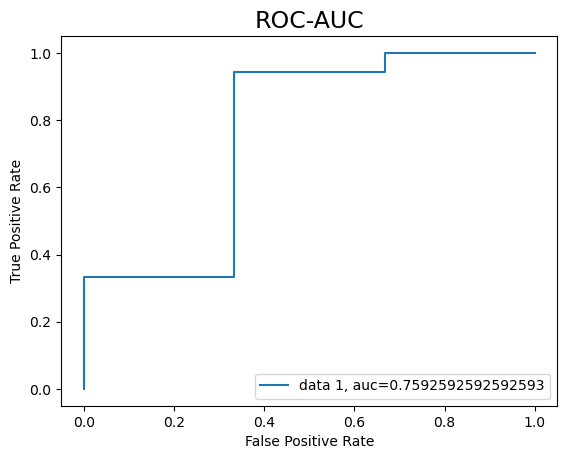

In [47]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC-AUC',fontsize=17)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

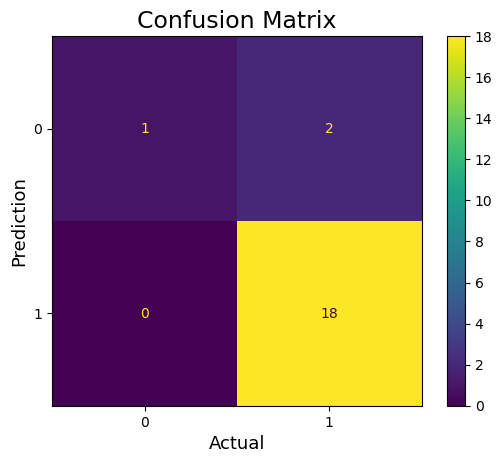

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)